<a href="https://colab.research.google.com/github/Dharshiniv2002/Python-Programs/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importing modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [32]:
# Loading the Dataset
df = pd.read_csv('dataset.csv',encoding='ISO-8859-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [33]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [34]:
# Preprocessing the dataset
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, "", input_txt)
  return input_txt

In [35]:
# Remove twitter handles (@user)
df['clean_SentimentText'] = np.vectorize(remove_pattern)(df['SentimentText'], "@[\w]*")

In [36]:
df.head()

,ItemID,Sentiment,SentimentText,clean_SentimentText
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...


In [37]:
# Remove special Characters, numbers and punctuations
df['clean_SentimentText'] = df['SentimentText'].str.replace("[^a-zA-Z#]", " ")
df.head()

,ItemID,Sentiment,SentimentText,clean_SentimentText
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...


In [38]:
# Remove short words
df['clean_SentimentText'] = df['SentimentText'].apply(lambda x:" ".join([w for w in x.split() if len(w)>2]))
df.head()

,ItemID,Sentiment,SentimentText,clean_SentimentText
0,1,0,is so sad for my APL frie...,sad for APL friend.............
1,2,0,I missed the New Moon trail...,missed the New Moon trailer...
2,3,1,omg its already 7:30 :O,omg its already 7:30
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga. sooo gunna CRy. I've been this dentist...
4,5,0,i think mi bf is cheating on me!!! ...,think cheating me!!! T_T


In [39]:
# Individual words considered as tokens
tokenized_text = df['clean_SentimentText'].apply(lambda x: x.split())
tokenized_text.head()

0                 [sad, for, APL, friend.............]
1                 [missed, the, New, Moon, trailer...]
2                            [omg, its, already, 7:30]
3    [Omgaga., sooo, gunna, CRy., I've, been, this,...
4                        [think, cheating, me!!!, T_T]
Name: clean_SentimentText, dtype: object

In [40]:
# Stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_text.head()

0                 [sad, for, apl, friend.............]
1                   [miss, the, new, moon, trailer...]
2                             [omg, it, alreadi, 7:30]
3    [omgaga., sooo, gunna, cry., i'v, been, thi, d...
4                           [think, cheat, me!!!, t_t]
Name: clean_SentimentText, dtype: object

In [41]:
# Combine words into single sentence
for i in range(len(tokenized_text)):
  tokenized_text[i] = " ".join(tokenized_text[i])

df['SentimentText'] = tokenized_text
df.head()

,ItemID,Sentiment,SentimentText,clean_SentimentText
0,1,0,sad for apl friend.............,sad for APL friend.............
1,2,0,miss the new moon trailer...,missed the New Moon trailer...
2,3,1,omg it alreadi 7:30,omg its already 7:30
3,4,0,omgaga. sooo gunna cry. i'v been thi dentist s...,Omgaga. sooo gunna CRy. I've been this dentist...
4,5,0,think cheat me!!! t_t,think cheating me!!! T_T


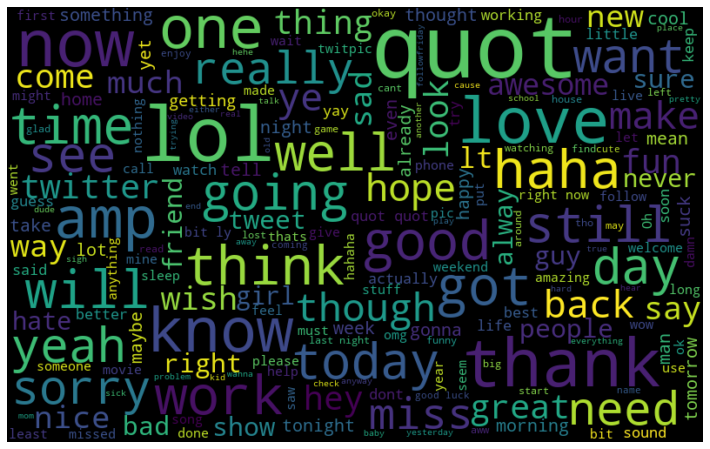

In [42]:
# Exploratory Data Analysis
# Display the frequent words
all_words = " ".join([s for s in df['clean_SentimentText']])

from wordcloud import WordCloud
wordcloud  = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

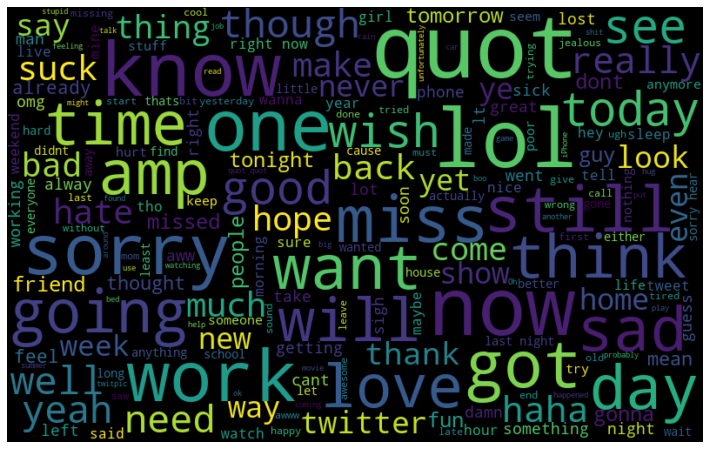

In [44]:
# frequent words visualiztion for positive
all_words = " ".join([s for s in df['clean_SentimentText'][df['Sentiment']==0]])

wordcloud  = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

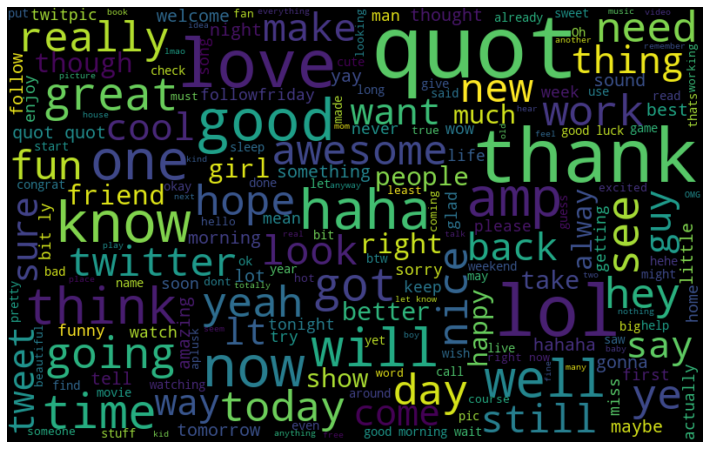

In [45]:
# frequent words visualiztion for Negative
all_words = " ".join([s for s in df['clean_SentimentText'][df['Sentiment']==1]])

wordcloud  = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [46]:
# Extracting the hashtag
def hashtag_extract(texts):
  hashtags = []
  # Loop words in the text
  for text in texts:
    ht = re.findall(r"#(\w+)", text)
    hashtags.append(ht)
  return hashtags

In [47]:
# Extracting hashtags from non racist texts
ht_positive = hashtag_extract(df['clean_SentimentText'][df['Sentiment']==0])

# Extracting hashtags from racist texts
ht_negative = hashtag_extract(df['clean_SentimentText'][df['Sentiment']==1])

In [48]:
ht_positive

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['3turnoffwords'],
 ['asylm'],
 ['squarespace'],
 ['Susan'],
 ['twenty20'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['iphone', 'comics'],
 ['Magic'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['kosherFAIL'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['squ

In [49]:
ht_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['poemsunder140'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Video'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['a'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['robotpickuplines'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['29'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['skydiving'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['andyhurleyday'],
 ['ASOT400'],
 ['followfriday'],

In [50]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])


In [52]:
ht_positive

['3turnoffwords',
 'asylm',
 'squarespace',
 'Susan',
 'twenty20',
 'iphone',
 'comics',
 'Magic',
 'kosherFAIL',
 'squarespace',
 'trackle',
 'canucks',
 'Battleground',
 'saveohiolibraries',
 'IranElection',
 'squarespace',
 'sadpanda',
 'fb',
 'SongStuckInMyHeadWhenIWokeUp',
 'fb',
 'betseyjohnson',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'IMISSCATH',
 'p1wimax',
 'trackle',
 'lol',
 'fail',
 'mlia',
 'squaresp',
 'squarespac',
 'squarespace',
 'trackle',
 'fail',
 'barakatday',
 'barakatday',
 'barakatday',
 'barakatday',
 'Iran',
 'fb',
 'Iran',
 'iranelection',
 'atltweet',
 'PakCricket',
 'imjustsayin',
 'talesfrmsurbs',
 'IranElection',
 'MCRchat',
 'whocangetit',
 '600',
 'fb',
 'cricket',
 'fb',
 'fb',
 'inaperfectworld',
 'masterchef',
 'littlekuribohYGOASsoundtrackalbum',
 'OSX',
 'FAIL',
 'wordcamp',
 'squarespace',
 'SYTYCD',
 'ChuckMeMondays',
 'chuck',
 're

In [53]:
ht_negative

['poemsunder140',
 'Video',
 'a',
 'robotpickuplines',
 '29',
 'skydiving',
 'andyhurleyday',
 'ASOT400',
 'followfriday',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'mcflyforgermany',
 'Hello',
 'World',
 'beautiful',
 '5am',
 'woop',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'tokiohotel',
 'shortstack',
 'Geek_And_Poke',
 'Holiday',
 'Holiday',
 'myweakness',
 'alpolitics',
 'followfriday',
 'stats',
 'followfriday',
 'f3s',
 'Herschel',
 'Planck',
 'musicmonday',
 'Followfriday',
 'FollowFriday',
 'squarespace',
 'squarespace',
 'e3',
 'clothdiapers',
 'Canterbury',
 'music',
 'UnfollowSunday',
 'istillbelieve',
 'Followfriday',
 '100miletraining',
 'sweatfest',
 '10yearsofEnema',
 '30SECONDSTOMARS',
 'marsiscoming',
 '30secondstomars',
 '30secondstomars',
 '30secondstomars',
 'marsiscoming',
 

In [54]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,3turnoffwords,20
1,asylm,11
2,squarespace,89
3,Susan,2
4,twenty20,2


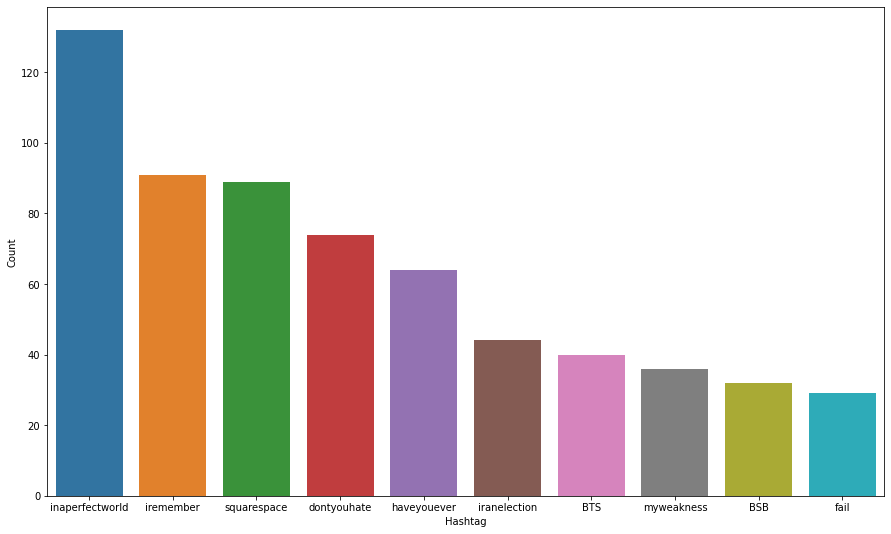

In [55]:
# Select the top 10 hashtags
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15,9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

In [56]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,poemsunder140,1
1,Video,4
2,a,1
3,robotpickuplines,10
4,29,1


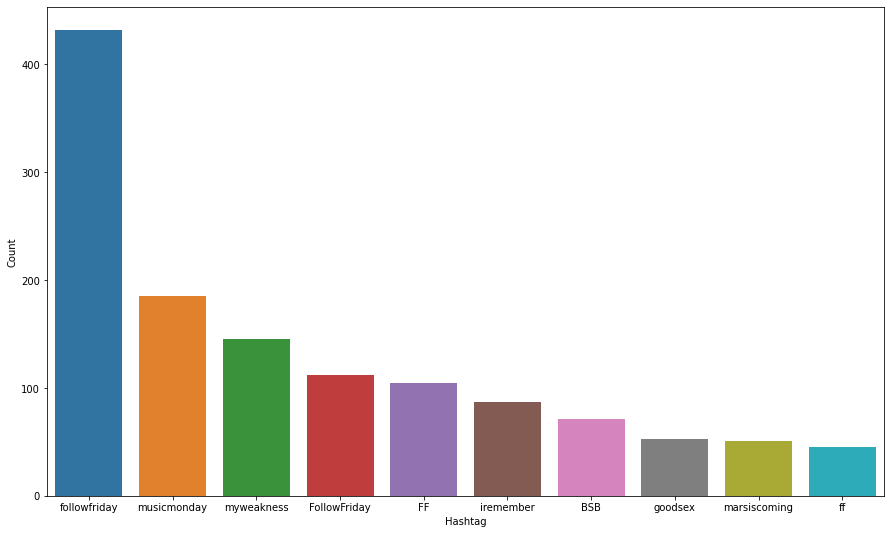

In [57]:
# Select the top 10 hashtags
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15,9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

In [58]:
# Input Split
# Feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
# Bag of words  = b
b_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
b = b_vectorizer.fit_transform(df['clean_SentimentText'])

In [60]:
b[0].toarray()
# You can see some of the one's in the below array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(b, df['Sentiment'], random_state=42, test_size = 0.25)


In [70]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [66]:
# Training the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
# Testing the model 
pred = model.predict(x_test)
f1_score(y_test, pred)

0.7759382626475826

In [71]:
accuracy_score(y_test, pred)

0.7282182574605969

In [72]:
# use probability to get output 
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >=0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.7710547833197056

In [73]:
accuracy_score(y_test, pred)

0.6863749099927994

In [74]:
pred_prob[0]

array([0.41743568, 0.58256432])

In [75]:
pred_prob[0][1] >=0.3

True